# 1. Install necessary libraries

In [35]:
# !pip install gensim
# !pip install matplotlib
# !pip install -U scikit-learn
# !pip install torch_geometric
# !pip install networkx
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

#  2. Graph  Construction

In [16]:
import networkx as nx
import random
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx

## 2.1. KarateClub

In [17]:
# Import the KarateClub dataset and select the first graph in the dataset
dataset = KarateClub()[0]

# Display the dataset
dataset

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [18]:
dataset.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [19]:
# Convert the dataset to a NetworkX graph
karate_graph = to_networkx(dataset)

# Iterate over each node in the NetworkX graph
for node in karate_graph.nodes:
    # Assign the class label from the dataset to the node's "class" attribute
    karate_graph.nodes[node]["class"] = dataset.y.tolist()[node]

In [20]:
# Retrieve all nodes in the karate_graph along with their attributes
karate_graph.nodes(data=True)

NodeDataView({0: {'class': 1}, 1: {'class': 1}, 2: {'class': 1}, 3: {'class': 1}, 4: {'class': 3}, 5: {'class': 3}, 6: {'class': 3}, 7: {'class': 1}, 8: {'class': 0}, 9: {'class': 1}, 10: {'class': 3}, 11: {'class': 1}, 12: {'class': 1}, 13: {'class': 1}, 14: {'class': 0}, 15: {'class': 0}, 16: {'class': 3}, 17: {'class': 1}, 18: {'class': 0}, 19: {'class': 1}, 20: {'class': 0}, 21: {'class': 1}, 22: {'class': 0}, 23: {'class': 0}, 24: {'class': 2}, 25: {'class': 2}, 26: {'class': 0}, 27: {'class': 0}, 28: {'class': 2}, 29: {'class': 0}, 30: {'class': 0}, 31: {'class': 2}, 32: {'class': 0}, 33: {'class': 0}})

# 3. Random Walk

In [21]:
'''
    graph : Graph
        The graph on which to perform the random walk.
    start_node : int
        The starting node of the random walk sequence.
    num_steps : int
        The length of the random walk sequence.
'''
def random_walk(graph, start_node, num_steps):
    # Initialize the result list to store the sequence of nodes visited
    result = []
    # Set the current node to the start node
    current_node = start_node
    
    # Perform the random walk for the specified number of steps
    for _ in range(num_steps):
        # Append the current node to the result list
        result.append(current_node)
        # Get the neighbors of the current node
        neighbors = list(graph.neighbors(current_node))
        
        # If the current node has no neighbors, break the loop
        if not neighbors:
            break
        
        # Randomly select the next node from the neighbors
        current_node = random.choice(neighbors)

    # Return the sequence of nodes visited during the random walk
    return result

In [22]:
# Randomly select a start node from the nodes in the karate_graph
start_node = random.choice(list(karate_graph.nodes()))

# Define the number of steps for the random walk (length of the sequence)
num_steps = 10

# Print a message indicating the start of the random walk
print("Random Walk:")

# Perform the random walk on the karate_graph starting from the start_node and for num_steps steps
result = random_walk(karate_graph, start_node, num_steps)

# Print the result of the random walk (the sequence of nodes visited)
print(result)

Random Walk:
[1, 3, 7, 1, 21, 0, 17, 1, 7, 2]


# 4. Deep Walk

In [23]:
import numpy as np
import random
from gensim.models import Word2Vec
from torch.utils.data import Dataset
from functools import partial

## 4.1. Building dataset

In [24]:
# Generate a list of 100 random walks on the karate_graph
dataset = [
    random_walk(
        karate_graph,  # The graph on which to perform the random walk
        start_node=random.choice(list(karate_graph.nodes)),  # Randomly select a start node from the graph's nodes
        num_steps=20  # Number of steps in each random walk
    ) 
    for _ in range(100)  # Repeat the process 100 times to generate 100 random walks
]

In [25]:
# Iterate over each random walk sequence in the dataset
for seq in dataset:
    # Print the current random walk sequence
    print(seq)

[15, 33, 14, 32, 15, 32, 31, 25, 31, 0, 21, 1, 13, 3, 2, 0, 5, 16, 6, 0]
[17, 1, 17, 1, 19, 0, 13, 3, 2, 8, 30, 33, 23, 33, 15, 32, 14, 32, 22, 33]
[9, 2, 9, 2, 28, 33, 23, 32, 33, 27, 23, 25, 23, 32, 15, 32, 18, 32, 20, 32]
[1, 0, 8, 0, 8, 33, 23, 25, 24, 31, 0, 19, 33, 9, 33, 8, 33, 32, 14, 32]
[28, 2, 0, 1, 21, 1, 17, 1, 17, 0, 12, 0, 7, 0, 11, 0, 10, 5, 16, 5]
[2, 28, 33, 15, 32, 31, 24, 25, 23, 29, 32, 14, 32, 14, 32, 29, 32, 33, 31, 28]
[32, 18, 33, 22, 32, 15, 32, 33, 29, 26, 29, 32, 14, 32, 15, 32, 14, 32, 22, 32]
[27, 33, 19, 0, 19, 0, 8, 30, 1, 21, 1, 2, 1, 17, 0, 12, 3, 13, 2, 32]
[23, 32, 20, 32, 2, 0, 7, 0, 3, 13, 3, 1, 19, 33, 9, 2, 3, 13, 0, 19]
[15, 33, 23, 25, 23, 33, 27, 23, 32, 29, 26, 33, 18, 33, 18, 33, 13, 1, 21, 1]
[30, 33, 19, 33, 15, 33, 31, 32, 2, 3, 12, 0, 7, 0, 13, 33, 20, 32, 30, 32]
[12, 3, 12, 0, 21, 0, 10, 4, 0, 2, 3, 12, 0, 12, 0, 8, 33, 14, 32, 14]
[18, 33, 19, 33, 20, 33, 18, 33, 29, 33, 8, 0, 21, 0, 21, 0, 13, 33, 18, 33]
[13, 33, 28, 33, 19, 0, 19, 

## 4.2. Run DeepWalk

In [26]:
# Import the Word2Vec class from the gensim library
from gensim.models import Word2Vec

# Create a Word2Vec model using the dataset of random walks
deepwalk = Word2Vec(
    dataset,        # The dataset of random walks
    vector_size=300,  # The size of the word vectors
    epochs=100       # The number of training epochs
)

In [27]:
# Retrieve the word vector for the node with index 1 from the Word2Vec model
deepwalk.wv[1]

array([-4.28042077e-02,  1.18562706e-01,  2.33856160e-02, -9.16411057e-02,
       -6.48594135e-03, -1.80745661e-01, -3.59608121e-02,  2.57204026e-01,
        7.34632313e-02, -7.11698309e-02,  1.26440614e-01, -1.44184858e-01,
       -1.24751620e-01,  1.37787819e-01, -3.50137204e-02,  1.73143987e-02,
        7.72830695e-02, -6.73723593e-02, -8.71455595e-02, -3.89006957e-02,
       -1.10568672e-01,  5.74580319e-02, -1.59772076e-02,  2.14255229e-01,
       -1.79783672e-01,  7.13987127e-02, -7.08623882e-03,  1.44568801e-01,
       -9.53725055e-02,  2.03037206e-02, -1.32281529e-02, -1.09520592e-01,
        6.31754622e-02, -2.94006970e-02, -7.09780231e-02,  1.22852184e-01,
        7.39577338e-02, -1.12287201e-01,  7.10068047e-02,  3.19490023e-02,
       -3.65500487e-02, -3.05717904e-02,  1.19634643e-02, -6.28316253e-02,
        1.82939976e-01,  6.98080212e-02, -1.16281077e-01,  3.63783687e-02,
        9.13951769e-02,  3.66724376e-03,  4.91487049e-02,  1.15507245e-02,
        2.07172204e-02,  

## 4.3. Visualize DeepWalk

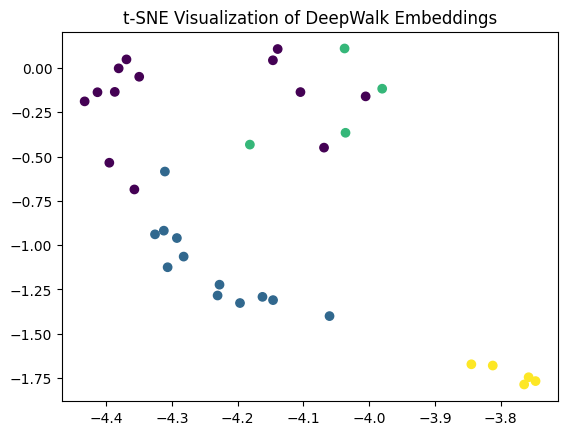

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

deepwalk_x = np.stack([deepwalk.wv[idx] for idx in range(34)])
deepwalk_y = np.stack([node[1]["class"] for node in karate_graph.nodes(data=True)])


# Perform t-SNE on the DeepWalk embeddings
tsne = TSNE(n_components=2)
tsne_deepwalk = tsne.fit_transform(deepwalk_x)

# Plot the t-SNE visualization
plt.scatter(tsne_deepwalk[:, 0], tsne_deepwalk[:, 1], c=deepwalk_y)
plt.title("t-SNE Visualization of DeepWalk Embeddings")
plt.show()

# 5. Node2Vec

## 5.1. Random Walk for Node2Vec

In [30]:
def node2vec_walk(G, start_node, num_steps, p, q):
    # Initialize the walk with the start node
    walk = [start_node]

    # Perform the walk for the specified number of steps
    for _ in range(num_steps - 1):
        # Get the current node (last node in the walk)
        current_node = walk[-1]
        # Get the neighbors of the current node
        neighbors = list(G.neighbors(current_node))

        if len(neighbors) > 0:
            # Check if the walk has just started
            if len(walk) == 1:
                next_node = random.choice(neighbors)
            else:
                # Otherwise, choose the next node based on the weighted choice
                next_node = node2vec_weighted_choice(G, current_node, walk[-2], p, q)

            # Append the chosen node to the walk
            walk.append(next_node)
        else:
            # If there are no neighbors, break the loop 
            break
    # Return the completed walk
    return walk

def node2vec_weighted_choice(G, current_node, previous_node, p, q):
    # Get the neighbors of the current node
    neighbors = list(G.neighbors(current_node))
    unnormalized_weights = []

    # Calculate unnormalized weights for each neighbor
    for neighbor in neighbors:
        if neighbor == previous_node:
            # If the neighbor is the previous node, apply the return parameter p
            unnormalized_weights.append(1.0 / p)
        elif G.has_edge(current_node, neighbor):
            # If the neighbor is connected to the current node, weight is 1
            unnormalized_weights.append(1.0)
        else:
            # Otherwise, apply the in-out parameter q
            unnormalized_weights.append(1.0 / q)

    # Normalize the weights
    norm_weights = [weight / sum(unnormalized_weights) for weight in unnormalized_weights]
    # Choose the next node based on the normalized weights
    return random.choices(neighbors, weights=norm_weights)[0]

In [42]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from gensim.models import Word2Vec

# Load the Karate Club dataset
karate_graph = nx.karate_club_graph()

# Generate a list of 100 random walks on the karate_graph
# Keep the nodes as integers while performing random walks
dataset2 = [
    [str(node) for node in node2vec_walk(  # Convert nodes to string just for Word2Vec
        karate_graph,  
        start_node=random.choice(list(karate_graph.nodes())),  # Use integer nodes
        num_steps=10,  
        p=0.8,  
        q=0.2  
    )]
    for _ in range(100)
]

# Train the Word2Vec model using the random walks generated
node2vec_model = Word2Vec(
    sentences=dataset2,    
    vector_size=200,       
    window=5,              
    min_count=1,           
    sg=1,                  
    epochs=100             
)

# Get the node embeddings learned by the Word2Vec model
# Convert node to string while accessing the embeddings
node_embeddings = np.array([node2vec_model.wv[str(node)] for node in karate_graph.nodes()])


## 5.2. Visualization

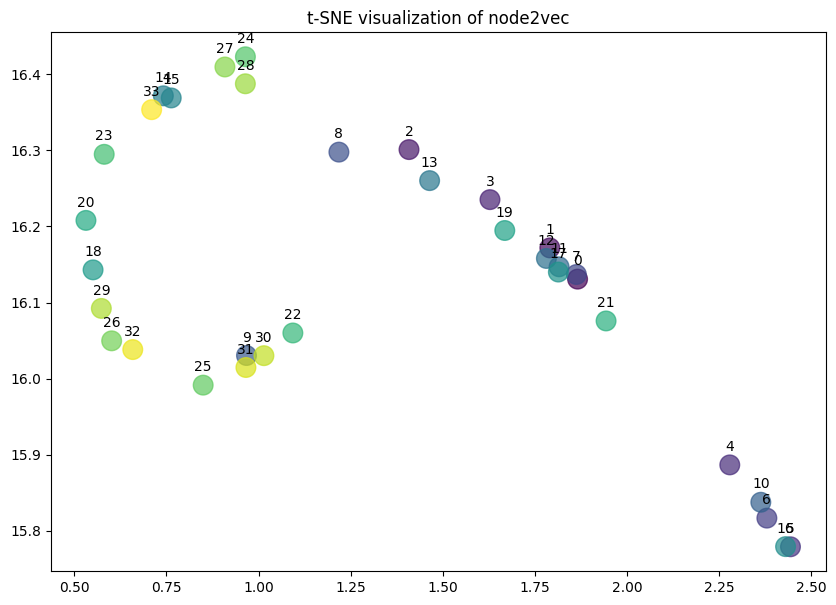

In [44]:
# Reduce dimensions using t-SNE to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

# Visualization
plt.figure(figsize=(10, 7))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], s=200, c=list(karate_graph.nodes()), cmap='viridis', alpha=0.7)

# Annotate nodes with their labels
for i, node in enumerate(karate_graph.nodes()):
    plt.annotate(str(node), (node_embeddings_2d[i, 0], node_embeddings_2d[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title("t-SNE visualization of node2vec")
plt.show()

# 6. LINE

## 6.1. Alias Sampling

In [51]:
import random
from decimal import *
import numpy as np
import collections
from tqdm import tqdm
import matplotlib.pyplot as plt

class VoseAlias:
    def __init__(self, dist):
        """
        (VoseAlias, dict) -> NoneType
        """
        self.dist = dist
        self.alias_initialisation()

    def alias_initialisation(self):
        """
        Construct probability and alias tables for the distribution
        """
        # Initialise variables
        n = len(self.dist)
        self.table_prob = {}   # probability table
        self.table_alias = {}  # alias table
        scaled_prob = {}       # scaled probabilities
        small = []             # stack for probabilities smaller that 1
        large = []             # stack for probabilities greater than or equal to 1

        # Construct and sort the scaled probabilities into their appropriate stacks
        print("1/2. Building and sorting scaled probabilities for alias table...")
        for o, p in tqdm(self.dist.items()):
            scaled_prob[o] = Decimal(p) * n

            if scaled_prob[o] < 1:
                small.append(o)
            else:
                large.append(o)

        print("2/2. Building alias table...")
        # Construct the probability and alias tables
        while small and large:
            s = small.pop()
            l = large.pop()

            self.table_prob[s] = scaled_prob[s]
            self.table_alias[s] = l

            scaled_prob[l] = (scaled_prob[l] + scaled_prob[s]) - Decimal(1)

            if scaled_prob[l] < 1:
                small.append(l)
            else:
                large.append(l)

        # The remaining outcomes (of one stack) must have probability 1
        while large:
            self.table_prob[large.pop()] = Decimal(1)

        while small:
            self.table_prob[small.pop()] = Decimal(1)
        self.listprobs = list(self.table_prob)

    def alias_generation(self):
        """
        Yields a random outcome from the distribution.
        """
        # Determine which column of table_prob to inspect
        col = random.choice(self.listprobs)
        # Determine which outcome to pick in that column
        if self.table_prob[col] >= random.uniform(0, 1):
            return col
        else:
            return self.table_alias[col]

    def sample_n(self, size):
        """
        Yields a sample of size n from the distribution, and print the results to stdout.
        """
        for i in range(size):
            yield self.alias_generation()


def makeDist(graph: nx.Graph, power=0.75):

    edgedistdict = collections.defaultdict(int)
    nodedistdict = collections.defaultdict(int)

    weightsdict = collections.defaultdict(int)
    nodedegrees = collections.defaultdict(int)

    weightsum = 0
    negprobsum = 0

    nlines = 0

    maxindex = 0

    # Iterate over all edges in the graph
    for edge in tqdm(graph.edges(data=True), total=nlines):
        node1, node2, weight = edge[0], edge[1], edge[2]["weight"]

        edgedistdict[tuple([node1, node2])] = weight
        nodedistdict[node1] += weight

        weightsdict[tuple([node1, node2])] = weight
        nodedegrees[node1] += weight

        weightsum += weight
        negprobsum += np.power(weight, power)

        if node1 > maxindex:
            maxindex = node1
        elif node2 > maxindex:
            maxindex = node2

    # Normalize node distribution dictionary
    for node, outdegree in nodedistdict.items():
        nodedistdict[node] = np.power(outdegree, power) / negprobsum

    # Normalize edge distribution dictionary
    for edge, weight in edgedistdict.items():
        edgedistdict[edge] = weight / weightsum

    return edgedistdict, nodedistdict, weightsdict, nodedegrees, maxindex


def negSampleBatch(sourcenode, targetnode, negsamplesize, weights,
                   nodedegrees, nodesaliassampler, t=10e-3):
    """
    For generating negative samples.
    """
    negsamples = 0
    while negsamples < negsamplesize:
        samplednode = nodesaliassampler.sample_n(1)
        if (samplednode == sourcenode) or (samplednode == targetnode):
            continue
        else:
            negsamples += 1
            yield samplednode


def makeData(samplededges, negsamplesize, weights, nodedegrees, nodesaliassampler):
    for e in samplededges:
        sourcenode, targetnode = e[0], e[1]
        negnodes = []
        for negsample in negSampleBatch(sourcenode, targetnode, negsamplesize,
                                        weights, nodedegrees, nodesaliassampler):
            for node in negsample:
                negnodes.append(node)
        yield [e[0], e[1]] + negnodes

## 6.2. LINE Model

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class LINE(nn.Module):
    def __init__(self, size, embed_dim=128, order=1):
        super(LINE, self).__init__()

        # Ensure the order is either 1 or 2
        assert order in [1, 2], print("Order should either be int(1) or int(2)")

        # Set embedding dimension and order
        self.embed_dim = embed_dim
        self.order = order

        # Initialize node embeddings
        self.nodes_embeddings = nn.Embedding(size, embed_dim)
        
        # If order is 2, initialize context node embeddings
        if order == 2:
            self.contextnodes_embeddings = nn.Embedding(size, embed_dim)
            # Initialize context node embeddings with uniform distribution
            self.contextnodes_embeddings.weight.data = self.contextnodes_embeddings.weight.data.uniform_(-.5, .5) / embed_dim

        # Initialize node embeddings with uniform distribution
        self.nodes_embeddings.weight.data = self.nodes_embeddings.weight.data.uniform_(-.5, .5) / embed_dim

    def forward(self, v_i, v_j, negsamples, device):
        # Get embeddings for input nodes and move to the specified device
        v_i = self.nodes_embeddings(v_i).to(device)

        # If order is 2, use context node embeddings for v_j and negative samples
        if self.order == 2:
            v_j = self.contextnodes_embeddings(v_j).to(device)
            negativenodes = -self.contextnodes_embeddings(negsamples).to(device)

        else:
            # Otherwise, use node embeddings for v_j and negative samples
            v_j = self.nodes_embeddings(v_j).to(device)
            negativenodes = -self.nodes_embeddings(negsamples).to(device)

        # Compute the positive batch by element-wise multiplication and log-sigmoid
        mulpositivebatch = torch.mul(v_i, v_j)
        positivebatch = F.logsigmoid(torch.sum(mulpositivebatch, dim=1))

        # Compute the negative batch by element-wise multiplication and log-sigmoid
        mulnegativebatch = torch.mul(v_i.view(len(v_i), 1, self.embed_dim), negativenodes)
        negativebatch = torch.sum(
            F.logsigmoid(
                torch.sum(mulnegativebatch, dim=2)
            ),
            dim=1)
        
        # Compute the loss as the sum of positive and negative batches
        loss = positivebatch + negativebatch
        # Return the mean negative loss        
        return -torch.mean(loss)

In [53]:
# Iterate over all edges in the karate_graph
for edge in karate_graph.edges():
    # Set the weight of each edge to 1
    karate_graph.edges[edge]["weight"] = 1

In [54]:
from tqdm import trange
import torch
import torch.optim as optim

# Define training parameters
args = {
    "epochs": 100,
    "order": 2,
    "num_neg": 5,
    "dim": 128,
    "batch_size": 10,
    "lr": 0.025,
    "neg_power": 0.75
}
# Create dict of distribution when opening file
edgedistdict, nodedistdict, weights, nodedegrees, maxindex = makeDist(karate_graph, args["neg_power"])

# Initialize VoseAlias samplers for edges and nodes
edgesaliassampler = VoseAlias(edgedistdict)
nodesaliassampler = VoseAlias(nodedistdict)

# Calculate the number of batches per epoch
batchrange = int(len(edgedistdict) / args["batch_size"])
print(maxindex)

# Initialize the LINE model
line = LINE(maxindex + 1, embed_dim=args["dim"], order=args["order"])

# Set up the optimizer with Stochastic Gradient Descent (SGD)
opt = optim.SGD(line.parameters(), lr=args["lr"], momentum=0.9, nesterov=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize a dictionary to store loss data
lossdata = {"it": [], "loss": []}
it = 0

print("\nTraining on {}\n".format(device))

# Training loop
for epoch in range(args["epochs"]):
    for b in trange(batchrange, desc=f"Epoch {epoch}"):
        # Sample a batch of edges
        samplededges = edgesaliassampler.sample_n(args["batch_size"])

        # Generate training data from sampled edges
        batch = list(makeData(samplededges, args["num_neg"], weights, nodedegrees, nodesaliassampler))
        batch = torch.LongTensor(batch)

        # Separate the batch into input nodes, context nodes, and negative samples
        v_i = batch[:, 0]
        v_j = batch[:, 1]
        negsamples = batch[:, 2:]

        # Zero the gradients
        line.zero_grad()

        # Compute the loss
        loss = line(v_i, v_j, negsamples, device)
        
        # Backpropagate the loss
        loss.backward()

        # Update the model parameters
        opt.step()

        # Store the loss and iteration number
        lossdata["loss"].append(loss.item())
        lossdata["it"].append(it)
        it += 1

78it [00:00, 81829.84it/s]


1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 78/78 [00:00<00:00, 323596.15it/s]


2/2. Building alias table...
1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 26/26 [00:00<00:00, 213827.26it/s]


2/2. Building alias table...
33

Training on cuda



Epoch 99: 100%|██████████| 7/7 [00:00<00:00, 1168.56it/s]


## 6.3. Visualization

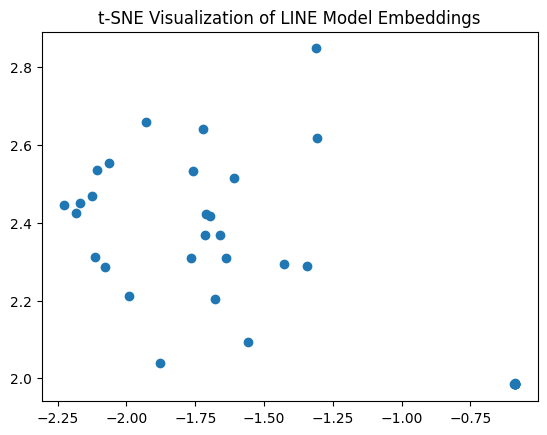

In [55]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

# Get the node embeddings learned by the LINE model
node_embeddings = line.nodes_embeddings.weight.data.cpu().numpy()

# Perform t-SNE on the node embeddings
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(node_embeddings)

# Plot the t-SNE visualization
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.title("t-SNE Visualization of LINE Model Embeddings")
plt.show()

# 7. Metapath2Vec

In [1]:
from torch_geometric.datasets.aminer import AMiner

# Load the AMiner dataset from the specified directory.
# The dataset will be downloaded if it is not already present in the directory.
aminer_data = AMiner("./")[0]

# Display the first graph object in the AMiner dataset.
# This object contains the graph structure and node/edge features.
aminer_data

HeteroData(
  author={
    y=[246678],
    y_index=[246678],
    num_nodes=1693531,
  },
  venue={
    y=[134],
    y_index=[134],
    num_nodes=3883,
  },
  paper={ num_nodes=3194405 },
  (paper, written_by, author)={ edge_index=[2, 9323605] },
  (author, writes, paper)={ edge_index=[2, 9323605] },
  (paper, published_in, venue)={ edge_index=[2, 3194405] },
  (venue, publishes, paper)={ edge_index=[2, 3194405] }
)

In [56]:
from torch_geometric.nn.models import MetaPath2Vec
import torch

# Define the metapath schema for the heterogeneous graph
metapath = [
    ('author', 'writes', 'paper'),
    ('paper', 'published_in', 'venue'),
    ('venue', 'publishes', 'paper'),
    ('paper', 'written_by', 'author'),
]

# Set the device to GPU if available, otherwise use CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize the MetaPath2Vec model with the specified parameters
model = MetaPath2Vec(
    aminer_data.edge_index_dict,  # Edge index dictionary from the AMiner dataset
    embedding_dim=128,            # Dimension of the embedding vectors
    metapath=metapath,            # Metapath schema
    walk_length=50,               # Length of each random walk
    context_size=7,               # Size of the context window
    walks_per_node=5,             # Number of walks per node
    num_negative_samples=5,       # Number of negative samples for negative sampling
    sparse=True                   # Use sparse gradients for optimization
).to(device)                      # Move the model to the specified device

# Create a data loader for generating batches of random walks
loader = model.loader(
    batch_size=128,  # Number of walks per batch
    shuffle=True,    # Shuffle the walks at each epoch
    num_workers=6    # Number of worker threads for data loading
)

# Set up the optimizer using SparseAdam for sparse gradients
optimizer = torch.optim.SparseAdam(
    list(model.parameters()),  # Model parameters to optimize
    lr=0.01                    # Learning rate
)

In [57]:
def train(epoch, log_steps=100, eval_steps=2000):
    '''
    :param log_steps: the value of step for log 
    :param eval_steps: the value of step for evaluation
    :return: 
    '''
    # Set the model to training mode
    model.train()

    total_loss = 0
    for i, (pos_rw, neg_rw) in enumerate(loader):
        # Zero the gradients for the optimizer
        optimizer.zero_grad()
        # Move positive and negative random walks to the GPU
        pos_rw = pos_rw.to(device)
        neg_rw = neg_rw.to(device)
        # Compute the loss using the model's loss function
        loss = model.loss(pos_rw, neg_rw)
        # Backpropagate the loss
        loss.backward()
        # Update the model parameters
        optimizer.step()

        # Accumulate the total loss
        total_loss += loss.item()
        # Log the loss at specified intervals
        if (i + 1) % log_steps == 0:
            print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
                   f'Loss: {total_loss / log_steps:.4f}'))
            total_loss = 0

        # Evaluate the model at specified intervals
        if (i + 1) % eval_steps == 0:
            acc = test()
            print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
                   f'Acc: {acc:.4f}'))


@torch.no_grad()
def test(train_ratio=0.1):
    # Set the model to evaluation mode
    model.eval()

    # Move data to GPU and get the embeddings for 'author' nodes
    z = model('author', batch=aminer_data['author'].y_index.to(device))
    y = aminer_data['author'].y.to(device)

    # Generate a random permutation of the indices
    perm = torch.randperm(z.size(0), device=device)
    # Split the indices into training and testing sets
    train_perm = perm[:int(z.size(0) * train_ratio)]
    test_perm = perm[int(z.size(0) * train_ratio):]

    # Test the model using the training and testing sets
    return model.test(z[train_perm], y[train_perm], z[test_perm], y[test_perm], max_iter=150)

In [58]:
for epoch in range(5): #2 
    train(epoch)
    acc = test()
    print(f'Epoch: {epoch}, Accuracy: {acc:.4f}')

Epoch: 0, Step: 00100/13231, Loss: 9.1068
Epoch: 0, Step: 00200/13231, Loss: 7.5709
Epoch: 0, Step: 00300/13231, Loss: 6.4638
Epoch: 0, Step: 00400/13231, Loss: 5.8499
Epoch: 0, Step: 00500/13231, Loss: 5.5869
Epoch: 0, Step: 00600/13231, Loss: 5.4366
Epoch: 0, Step: 00700/13231, Loss: 5.2990
Epoch: 0, Step: 00800/13231, Loss: 5.1677
Epoch: 0, Step: 00900/13231, Loss: 5.0480
Epoch: 0, Step: 01000/13231, Loss: 4.9252
Epoch: 0, Step: 01100/13231, Loss: 4.8128
Epoch: 0, Step: 01200/13231, Loss: 4.7016
Epoch: 0, Step: 01300/13231, Loss: 4.5950
Epoch: 0, Step: 01400/13231, Loss: 4.4924
Epoch: 0, Step: 01500/13231, Loss: 4.3958
Epoch: 0, Step: 01600/13231, Loss: 4.2974
Epoch: 0, Step: 01700/13231, Loss: 4.2044
Epoch: 0, Step: 01800/13231, Loss: 4.1105
Epoch: 0, Step: 01900/13231, Loss: 4.0207
Epoch: 0, Step: 02000/13231, Loss: 3.9361


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 02000/13231, Acc: 0.2902
Epoch: 0, Step: 02100/13231, Loss: 3.8544
Epoch: 0, Step: 02200/13231, Loss: 3.7706
Epoch: 0, Step: 02300/13231, Loss: 3.6901
Epoch: 0, Step: 02400/13231, Loss: 3.6127
Epoch: 0, Step: 02500/13231, Loss: 3.5349
Epoch: 0, Step: 02600/13231, Loss: 3.4633
Epoch: 0, Step: 02700/13231, Loss: 3.3873
Epoch: 0, Step: 02800/13231, Loss: 3.3176
Epoch: 0, Step: 02900/13231, Loss: 3.2506
Epoch: 0, Step: 03000/13231, Loss: 3.1837
Epoch: 0, Step: 03100/13231, Loss: 3.1184
Epoch: 0, Step: 03200/13231, Loss: 3.0564
Epoch: 0, Step: 03300/13231, Loss: 2.9937
Epoch: 0, Step: 03400/13231, Loss: 2.9365
Epoch: 0, Step: 03500/13231, Loss: 2.8767
Epoch: 0, Step: 03600/13231, Loss: 2.8214
Epoch: 0, Step: 03700/13231, Loss: 2.7710
Epoch: 0, Step: 03800/13231, Loss: 2.7146
Epoch: 0, Step: 03900/13231, Loss: 2.6649
Epoch: 0, Step: 04000/13231, Loss: 2.6174


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 04000/13231, Acc: 0.4691
Epoch: 0, Step: 04100/13231, Loss: 2.5679
Epoch: 0, Step: 04200/13231, Loss: 2.5216
Epoch: 0, Step: 04300/13231, Loss: 2.4768
Epoch: 0, Step: 04400/13231, Loss: 2.4352
Epoch: 0, Step: 04500/13231, Loss: 2.3956
Epoch: 0, Step: 04600/13231, Loss: 2.3544
Epoch: 0, Step: 04700/13231, Loss: 2.3159
Epoch: 0, Step: 04800/13231, Loss: 2.2757
Epoch: 0, Step: 04900/13231, Loss: 2.2397
Epoch: 0, Step: 05000/13231, Loss: 2.2053
Epoch: 0, Step: 05100/13231, Loss: 2.1724
Epoch: 0, Step: 05200/13231, Loss: 2.1390
Epoch: 0, Step: 05300/13231, Loss: 2.1088
Epoch: 0, Step: 05400/13231, Loss: 2.0767
Epoch: 0, Step: 05500/13231, Loss: 2.0488
Epoch: 0, Step: 05600/13231, Loss: 2.0204
Epoch: 0, Step: 05700/13231, Loss: 1.9925
Epoch: 0, Step: 05800/13231, Loss: 1.9669
Epoch: 0, Step: 05900/13231, Loss: 1.9403
Epoch: 0, Step: 06000/13231, Loss: 1.9158


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 06000/13231, Acc: 0.6431
Epoch: 0, Step: 06100/13231, Loss: 1.8911
Epoch: 0, Step: 06200/13231, Loss: 1.8700
Epoch: 0, Step: 06300/13231, Loss: 1.8459
Epoch: 0, Step: 06400/13231, Loss: 1.8251
Epoch: 0, Step: 06500/13231, Loss: 1.8042
Epoch: 0, Step: 06600/13231, Loss: 1.7823
Epoch: 0, Step: 06700/13231, Loss: 1.7637
Epoch: 0, Step: 06800/13231, Loss: 1.7457
Epoch: 0, Step: 06900/13231, Loss: 1.7260
Epoch: 0, Step: 07000/13231, Loss: 1.7080
Epoch: 0, Step: 07100/13231, Loss: 1.6909
Epoch: 0, Step: 07200/13231, Loss: 1.6736
Epoch: 0, Step: 07300/13231, Loss: 1.6570
Epoch: 0, Step: 07400/13231, Loss: 1.6420
Epoch: 0, Step: 07500/13231, Loss: 1.6276
Epoch: 0, Step: 07600/13231, Loss: 1.6124
Epoch: 0, Step: 07700/13231, Loss: 1.5976
Epoch: 0, Step: 07800/13231, Loss: 1.5839
Epoch: 0, Step: 07900/13231, Loss: 1.5696
Epoch: 0, Step: 08000/13231, Loss: 1.5559


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 08000/13231, Acc: 0.7415
Epoch: 0, Step: 08100/13231, Loss: 1.5424
Epoch: 0, Step: 08200/13231, Loss: 1.5311
Epoch: 0, Step: 08300/13231, Loss: 1.5184
Epoch: 0, Step: 08400/13231, Loss: 1.5065
Epoch: 0, Step: 08500/13231, Loss: 1.4951
Epoch: 0, Step: 08600/13231, Loss: 1.4822
Epoch: 0, Step: 08700/13231, Loss: 1.4734
Epoch: 0, Step: 08800/13231, Loss: 1.4608
Epoch: 0, Step: 08900/13231, Loss: 1.4496
Epoch: 0, Step: 09000/13231, Loss: 1.4397
Epoch: 0, Step: 09100/13231, Loss: 1.4295
Epoch: 0, Step: 09200/13231, Loss: 1.4201
Epoch: 0, Step: 09300/13231, Loss: 1.4101
Epoch: 0, Step: 09400/13231, Loss: 1.4008
Epoch: 0, Step: 09500/13231, Loss: 1.3912
Epoch: 0, Step: 09600/13231, Loss: 1.3832
Epoch: 0, Step: 09700/13231, Loss: 1.3737
Epoch: 0, Step: 09800/13231, Loss: 1.3656
Epoch: 0, Step: 09900/13231, Loss: 1.3569
Epoch: 0, Step: 10000/13231, Loss: 1.3489


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 10000/13231, Acc: 0.7935
Epoch: 0, Step: 10100/13231, Loss: 1.3404
Epoch: 0, Step: 10200/13231, Loss: 1.3329
Epoch: 0, Step: 10300/13231, Loss: 1.3254
Epoch: 0, Step: 10400/13231, Loss: 1.3173
Epoch: 0, Step: 10500/13231, Loss: 1.3101
Epoch: 0, Step: 10600/13231, Loss: 1.3029
Epoch: 0, Step: 10700/13231, Loss: 1.2954
Epoch: 0, Step: 10800/13231, Loss: 1.2886
Epoch: 0, Step: 10900/13231, Loss: 1.2818
Epoch: 0, Step: 11000/13231, Loss: 1.2743
Epoch: 0, Step: 11100/13231, Loss: 1.2686
Epoch: 0, Step: 11200/13231, Loss: 1.2617
Epoch: 0, Step: 11300/13231, Loss: 1.2557
Epoch: 0, Step: 11400/13231, Loss: 1.2487
Epoch: 0, Step: 11500/13231, Loss: 1.2437
Epoch: 0, Step: 11600/13231, Loss: 1.2376
Epoch: 0, Step: 11700/13231, Loss: 1.2311
Epoch: 0, Step: 11800/13231, Loss: 1.2256
Epoch: 0, Step: 11900/13231, Loss: 1.2203
Epoch: 0, Step: 12000/13231, Loss: 1.2148


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 12000/13231, Acc: 0.8249
Epoch: 0, Step: 12100/13231, Loss: 1.2091
Epoch: 0, Step: 12200/13231, Loss: 1.2037
Epoch: 0, Step: 12300/13231, Loss: 1.1988
Epoch: 0, Step: 12400/13231, Loss: 1.1935
Epoch: 0, Step: 12500/13231, Loss: 1.1883
Epoch: 0, Step: 12600/13231, Loss: 1.1832
Epoch: 0, Step: 12700/13231, Loss: 1.1784
Epoch: 0, Step: 12800/13231, Loss: 1.1738
Epoch: 0, Step: 12900/13231, Loss: 1.1687
Epoch: 0, Step: 13000/13231, Loss: 1.1641
Epoch: 0, Step: 13100/13231, Loss: 1.1602
Epoch: 0, Step: 13200/13231, Loss: 1.1557


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Accuracy: 0.8379
Epoch: 1, Step: 00100/13231, Loss: 1.1493
Epoch: 1, Step: 00200/13231, Loss: 1.1450
Epoch: 1, Step: 00300/13231, Loss: 1.1407
Epoch: 1, Step: 00400/13231, Loss: 1.1363
Epoch: 1, Step: 00500/13231, Loss: 1.1323
Epoch: 1, Step: 00600/13231, Loss: 1.1285
Epoch: 1, Step: 00700/13231, Loss: 1.1247
Epoch: 1, Step: 00800/13231, Loss: 1.1202
Epoch: 1, Step: 00900/13231, Loss: 1.1162
Epoch: 1, Step: 01000/13231, Loss: 1.1139
Epoch: 1, Step: 01100/13231, Loss: 1.1096
Epoch: 1, Step: 01200/13231, Loss: 1.1059
Epoch: 1, Step: 01300/13231, Loss: 1.1023
Epoch: 1, Step: 01400/13231, Loss: 1.0988
Epoch: 1, Step: 01500/13231, Loss: 1.0952
Epoch: 1, Step: 01600/13231, Loss: 1.0924
Epoch: 1, Step: 01700/13231, Loss: 1.0889
Epoch: 1, Step: 01800/13231, Loss: 1.0851
Epoch: 1, Step: 01900/13231, Loss: 1.0824
Epoch: 1, Step: 02000/13231, Loss: 1.0788


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 02000/13231, Acc: 0.8529
Epoch: 1, Step: 02100/13231, Loss: 1.0761
Epoch: 1, Step: 02200/13231, Loss: 1.0733
Epoch: 1, Step: 02300/13231, Loss: 1.0703
Epoch: 1, Step: 02400/13231, Loss: 1.0668
Epoch: 1, Step: 02500/13231, Loss: 1.0642
Epoch: 1, Step: 02600/13231, Loss: 1.0613
Epoch: 1, Step: 02700/13231, Loss: 1.0588
Epoch: 1, Step: 02800/13231, Loss: 1.0555
Epoch: 1, Step: 02900/13231, Loss: 1.0524
Epoch: 1, Step: 03000/13231, Loss: 1.0497
Epoch: 1, Step: 03100/13231, Loss: 1.0476
Epoch: 1, Step: 03200/13231, Loss: 1.0445
Epoch: 1, Step: 03300/13231, Loss: 1.0428
Epoch: 1, Step: 03400/13231, Loss: 1.0395
Epoch: 1, Step: 03500/13231, Loss: 1.0375
Epoch: 1, Step: 03600/13231, Loss: 1.0346
Epoch: 1, Step: 03700/13231, Loss: 1.0324
Epoch: 1, Step: 03800/13231, Loss: 1.0304
Epoch: 1, Step: 03900/13231, Loss: 1.0274
Epoch: 1, Step: 04000/13231, Loss: 1.0254


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 04000/13231, Acc: 0.8637
Epoch: 1, Step: 04100/13231, Loss: 1.0229
Epoch: 1, Step: 04200/13231, Loss: 1.0208
Epoch: 1, Step: 04300/13231, Loss: 1.0185
Epoch: 1, Step: 04400/13231, Loss: 1.0163
Epoch: 1, Step: 04500/13231, Loss: 1.0147
Epoch: 1, Step: 04600/13231, Loss: 1.0118
Epoch: 1, Step: 04700/13231, Loss: 1.0102
Epoch: 1, Step: 04800/13231, Loss: 1.0086
Epoch: 1, Step: 04900/13231, Loss: 1.0060
Epoch: 1, Step: 05000/13231, Loss: 1.0039
Epoch: 1, Step: 05100/13231, Loss: 1.0026
Epoch: 1, Step: 05200/13231, Loss: 0.9998
Epoch: 1, Step: 05300/13231, Loss: 0.9984
Epoch: 1, Step: 05400/13231, Loss: 0.9960
Epoch: 1, Step: 05500/13231, Loss: 0.9943
Epoch: 1, Step: 05600/13231, Loss: 0.9928
Epoch: 1, Step: 05700/13231, Loss: 0.9909
Epoch: 1, Step: 05800/13231, Loss: 0.9892
Epoch: 1, Step: 05900/13231, Loss: 0.9873
Epoch: 1, Step: 06000/13231, Loss: 0.9857


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 06000/13231, Acc: 0.8722
Epoch: 1, Step: 06100/13231, Loss: 0.9838
Epoch: 1, Step: 06200/13231, Loss: 0.9821
Epoch: 1, Step: 06300/13231, Loss: 0.9808
Epoch: 1, Step: 06400/13231, Loss: 0.9793
Epoch: 1, Step: 06500/13231, Loss: 0.9773
Epoch: 1, Step: 06600/13231, Loss: 0.9755
Epoch: 1, Step: 06700/13231, Loss: 0.9739
Epoch: 1, Step: 06800/13231, Loss: 0.9726
Epoch: 1, Step: 06900/13231, Loss: 0.9711
Epoch: 1, Step: 07000/13231, Loss: 0.9692
Epoch: 1, Step: 07100/13231, Loss: 0.9681
Epoch: 1, Step: 07200/13231, Loss: 0.9667
Epoch: 1, Step: 07300/13231, Loss: 0.9650
Epoch: 1, Step: 07400/13231, Loss: 0.9637
Epoch: 1, Step: 07500/13231, Loss: 0.9621
Epoch: 1, Step: 07600/13231, Loss: 0.9612
Epoch: 1, Step: 07700/13231, Loss: 0.9598
Epoch: 1, Step: 07800/13231, Loss: 0.9582
Epoch: 1, Step: 07900/13231, Loss: 0.9569
Epoch: 1, Step: 08000/13231, Loss: 0.9558


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 08000/13231, Acc: 0.8796
Epoch: 1, Step: 08100/13231, Loss: 0.9542
Epoch: 1, Step: 08200/13231, Loss: 0.9533
Epoch: 1, Step: 08300/13231, Loss: 0.9516
Epoch: 1, Step: 08400/13231, Loss: 0.9505
Epoch: 1, Step: 08500/13231, Loss: 0.9494
Epoch: 1, Step: 08600/13231, Loss: 0.9480
Epoch: 1, Step: 08700/13231, Loss: 0.9472
Epoch: 1, Step: 08800/13231, Loss: 0.9456
Epoch: 1, Step: 08900/13231, Loss: 0.9445
Epoch: 1, Step: 09000/13231, Loss: 0.9435
Epoch: 1, Step: 09100/13231, Loss: 0.9421
Epoch: 1, Step: 09200/13231, Loss: 0.9412
Epoch: 1, Step: 09300/13231, Loss: 0.9404
Epoch: 1, Step: 09400/13231, Loss: 0.9389
Epoch: 1, Step: 09500/13231, Loss: 0.9380
Epoch: 1, Step: 09600/13231, Loss: 0.9372
Epoch: 1, Step: 09700/13231, Loss: 0.9364
Epoch: 1, Step: 09800/13231, Loss: 0.9350
Epoch: 1, Step: 09900/13231, Loss: 0.9337
Epoch: 1, Step: 10000/13231, Loss: 0.9327


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 10000/13231, Acc: 0.8836
Epoch: 1, Step: 10100/13231, Loss: 0.9315
Epoch: 1, Step: 10200/13231, Loss: 0.9311
Epoch: 1, Step: 10300/13231, Loss: 0.9299
Epoch: 1, Step: 10400/13231, Loss: 0.9292
Epoch: 1, Step: 10500/13231, Loss: 0.9284
Epoch: 1, Step: 10600/13231, Loss: 0.9270
Epoch: 1, Step: 10700/13231, Loss: 0.9264
Epoch: 1, Step: 10800/13231, Loss: 0.9252
Epoch: 1, Step: 10900/13231, Loss: 0.9241
Epoch: 1, Step: 11000/13231, Loss: 0.9237
Epoch: 1, Step: 11100/13231, Loss: 0.9227
Epoch: 1, Step: 11200/13231, Loss: 0.9216
Epoch: 1, Step: 11300/13231, Loss: 0.9208
Epoch: 1, Step: 11400/13231, Loss: 0.9202
Epoch: 1, Step: 11500/13231, Loss: 0.9193
Epoch: 1, Step: 11600/13231, Loss: 0.9185
Epoch: 1, Step: 11700/13231, Loss: 0.9179
Epoch: 1, Step: 11800/13231, Loss: 0.9172
Epoch: 1, Step: 11900/13231, Loss: 0.9161
Epoch: 1, Step: 12000/13231, Loss: 0.9153


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 12000/13231, Acc: 0.8892
Epoch: 1, Step: 12100/13231, Loss: 0.9145
Epoch: 1, Step: 12200/13231, Loss: 0.9137
Epoch: 1, Step: 12300/13231, Loss: 0.9128
Epoch: 1, Step: 12400/13231, Loss: 0.9120
Epoch: 1, Step: 12500/13231, Loss: 0.9116
Epoch: 1, Step: 12600/13231, Loss: 0.9099
Epoch: 1, Step: 12700/13231, Loss: 0.9099
Epoch: 1, Step: 12800/13231, Loss: 0.9094
Epoch: 1, Step: 12900/13231, Loss: 0.9086
Epoch: 1, Step: 13000/13231, Loss: 0.9078
Epoch: 1, Step: 13100/13231, Loss: 0.9070
Epoch: 1, Step: 13200/13231, Loss: 0.9063


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Accuracy: 0.8910
Epoch: 2, Step: 00100/13231, Loss: 0.9050
Epoch: 2, Step: 00200/13231, Loss: 0.9044
Epoch: 2, Step: 00300/13231, Loss: 0.9042
Epoch: 2, Step: 00400/13231, Loss: 0.9036
Epoch: 2, Step: 00500/13231, Loss: 0.9027
Epoch: 2, Step: 00600/13231, Loss: 0.9021
Epoch: 2, Step: 00700/13231, Loss: 0.9013
Epoch: 2, Step: 00800/13231, Loss: 0.9011
Epoch: 2, Step: 00900/13231, Loss: 0.9003
Epoch: 2, Step: 01000/13231, Loss: 0.9001
Epoch: 2, Step: 01100/13231, Loss: 0.8993
Epoch: 2, Step: 01200/13231, Loss: 0.8984
Epoch: 2, Step: 01300/13231, Loss: 0.8979
Epoch: 2, Step: 01400/13231, Loss: 0.8975
Epoch: 2, Step: 01500/13231, Loss: 0.8970
Epoch: 2, Step: 01600/13231, Loss: 0.8964
Epoch: 2, Step: 01700/13231, Loss: 0.8958
Epoch: 2, Step: 01800/13231, Loss: 0.8953
Epoch: 2, Step: 01900/13231, Loss: 0.8946
Epoch: 2, Step: 02000/13231, Loss: 0.8942


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 02000/13231, Acc: 0.8939
Epoch: 2, Step: 02100/13231, Loss: 0.8937
Epoch: 2, Step: 02200/13231, Loss: 0.8929
Epoch: 2, Step: 02300/13231, Loss: 0.8926
Epoch: 2, Step: 02400/13231, Loss: 0.8916
Epoch: 2, Step: 02500/13231, Loss: 0.8913
Epoch: 2, Step: 02600/13231, Loss: 0.8906
Epoch: 2, Step: 02700/13231, Loss: 0.8903
Epoch: 2, Step: 02800/13231, Loss: 0.8904
Epoch: 2, Step: 02900/13231, Loss: 0.8895
Epoch: 2, Step: 03000/13231, Loss: 0.8890
Epoch: 2, Step: 03100/13231, Loss: 0.8889
Epoch: 2, Step: 03200/13231, Loss: 0.8882
Epoch: 2, Step: 03300/13231, Loss: 0.8873
Epoch: 2, Step: 03400/13231, Loss: 0.8870
Epoch: 2, Step: 03500/13231, Loss: 0.8867
Epoch: 2, Step: 03600/13231, Loss: 0.8862
Epoch: 2, Step: 03700/13231, Loss: 0.8858
Epoch: 2, Step: 03800/13231, Loss: 0.8852
Epoch: 2, Step: 03900/13231, Loss: 0.8850
Epoch: 2, Step: 04000/13231, Loss: 0.8845


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 04000/13231, Acc: 0.8962
Epoch: 2, Step: 04100/13231, Loss: 0.8839
Epoch: 2, Step: 04200/13231, Loss: 0.8836
Epoch: 2, Step: 04300/13231, Loss: 0.8832
Epoch: 2, Step: 04400/13231, Loss: 0.8830
Epoch: 2, Step: 04500/13231, Loss: 0.8821
Epoch: 2, Step: 04600/13231, Loss: 0.8820
Epoch: 2, Step: 04700/13231, Loss: 0.8815
Epoch: 2, Step: 04800/13231, Loss: 0.8813
Epoch: 2, Step: 04900/13231, Loss: 0.8809
Epoch: 2, Step: 05000/13231, Loss: 0.8802
Epoch: 2, Step: 05100/13231, Loss: 0.8801
Epoch: 2, Step: 05200/13231, Loss: 0.8794
Epoch: 2, Step: 05300/13231, Loss: 0.8790
Epoch: 2, Step: 05400/13231, Loss: 0.8787
Epoch: 2, Step: 05500/13231, Loss: 0.8789
Epoch: 2, Step: 05600/13231, Loss: 0.8781
Epoch: 2, Step: 05700/13231, Loss: 0.8775
Epoch: 2, Step: 05800/13231, Loss: 0.8770
Epoch: 2, Step: 05900/13231, Loss: 0.8769
Epoch: 2, Step: 06000/13231, Loss: 0.8769


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 06000/13231, Acc: 0.8987
Epoch: 2, Step: 06100/13231, Loss: 0.8765
Epoch: 2, Step: 06200/13231, Loss: 0.8760
Epoch: 2, Step: 06300/13231, Loss: 0.8756
Epoch: 2, Step: 06400/13231, Loss: 0.8753
Epoch: 2, Step: 06500/13231, Loss: 0.8747
Epoch: 2, Step: 06600/13231, Loss: 0.8742
Epoch: 2, Step: 06700/13231, Loss: 0.8742
Epoch: 2, Step: 06800/13231, Loss: 0.8741
Epoch: 2, Step: 06900/13231, Loss: 0.8737
Epoch: 2, Step: 07000/13231, Loss: 0.8733
Epoch: 2, Step: 07100/13231, Loss: 0.8728
Epoch: 2, Step: 07200/13231, Loss: 0.8724
Epoch: 2, Step: 07300/13231, Loss: 0.8723
Epoch: 2, Step: 07400/13231, Loss: 0.8722
Epoch: 2, Step: 07500/13231, Loss: 0.8718
Epoch: 2, Step: 07600/13231, Loss: 0.8714
Epoch: 2, Step: 07700/13231, Loss: 0.8716
Epoch: 2, Step: 07800/13231, Loss: 0.8708
Epoch: 2, Step: 07900/13231, Loss: 0.8706
Epoch: 2, Step: 08000/13231, Loss: 0.8704


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 08000/13231, Acc: 0.9011
Epoch: 2, Step: 08100/13231, Loss: 0.8699
Epoch: 2, Step: 08200/13231, Loss: 0.8694
Epoch: 2, Step: 08300/13231, Loss: 0.8696
Epoch: 2, Step: 08400/13231, Loss: 0.8690
Epoch: 2, Step: 08500/13231, Loss: 0.8690
Epoch: 2, Step: 08600/13231, Loss: 0.8686
Epoch: 2, Step: 08700/13231, Loss: 0.8684
Epoch: 2, Step: 08800/13231, Loss: 0.8680
Epoch: 2, Step: 08900/13231, Loss: 0.8674
Epoch: 2, Step: 09000/13231, Loss: 0.8675
Epoch: 2, Step: 09100/13231, Loss: 0.8672
Epoch: 2, Step: 09200/13231, Loss: 0.8669
Epoch: 2, Step: 09300/13231, Loss: 0.8664
Epoch: 2, Step: 09400/13231, Loss: 0.8666
Epoch: 2, Step: 09500/13231, Loss: 0.8660
Epoch: 2, Step: 09600/13231, Loss: 0.8659
Epoch: 2, Step: 09700/13231, Loss: 0.8653
Epoch: 2, Step: 09800/13231, Loss: 0.8655
Epoch: 2, Step: 09900/13231, Loss: 0.8652
Epoch: 2, Step: 10000/13231, Loss: 0.8652


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 10000/13231, Acc: 0.9037
Epoch: 2, Step: 10100/13231, Loss: 0.8647
Epoch: 2, Step: 10200/13231, Loss: 0.8645
Epoch: 2, Step: 10300/13231, Loss: 0.8644
Epoch: 2, Step: 10400/13231, Loss: 0.8638
Epoch: 2, Step: 10500/13231, Loss: 0.8638
Epoch: 2, Step: 10600/13231, Loss: 0.8634
Epoch: 2, Step: 10700/13231, Loss: 0.8637
Epoch: 2, Step: 10800/13231, Loss: 0.8629
Epoch: 2, Step: 10900/13231, Loss: 0.8628
Epoch: 2, Step: 11000/13231, Loss: 0.8626
Epoch: 2, Step: 11100/13231, Loss: 0.8624
Epoch: 2, Step: 11200/13231, Loss: 0.8622
Epoch: 2, Step: 11300/13231, Loss: 0.8620
Epoch: 2, Step: 11400/13231, Loss: 0.8614
Epoch: 2, Step: 11500/13231, Loss: 0.8616
Epoch: 2, Step: 11600/13231, Loss: 0.8611
Epoch: 2, Step: 11700/13231, Loss: 0.8610
Epoch: 2, Step: 11800/13231, Loss: 0.8609
Epoch: 2, Step: 11900/13231, Loss: 0.8608
Epoch: 2, Step: 12000/13231, Loss: 0.8604


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 12000/13231, Acc: 0.9053
Epoch: 2, Step: 12100/13231, Loss: 0.8601
Epoch: 2, Step: 12200/13231, Loss: 0.8597
Epoch: 2, Step: 12300/13231, Loss: 0.8602
Epoch: 2, Step: 12400/13231, Loss: 0.8597
Epoch: 2, Step: 12500/13231, Loss: 0.8593
Epoch: 2, Step: 12600/13231, Loss: 0.8589
Epoch: 2, Step: 12700/13231, Loss: 0.8587
Epoch: 2, Step: 12800/13231, Loss: 0.8588
Epoch: 2, Step: 12900/13231, Loss: 0.8586
Epoch: 2, Step: 13000/13231, Loss: 0.8581
Epoch: 2, Step: 13100/13231, Loss: 0.8582
Epoch: 2, Step: 13200/13231, Loss: 0.8580


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Accuracy: 0.9057
Epoch: 3, Step: 00100/13231, Loss: 0.8573
Epoch: 3, Step: 00200/13231, Loss: 0.8573
Epoch: 3, Step: 00300/13231, Loss: 0.8568
Epoch: 3, Step: 00400/13231, Loss: 0.8568
Epoch: 3, Step: 00500/13231, Loss: 0.8567
Epoch: 3, Step: 00600/13231, Loss: 0.8564
Epoch: 3, Step: 00700/13231, Loss: 0.8562
Epoch: 3, Step: 00800/13231, Loss: 0.8562
Epoch: 3, Step: 00900/13231, Loss: 0.8561
Epoch: 3, Step: 01000/13231, Loss: 0.8562
Epoch: 3, Step: 01100/13231, Loss: 0.8554
Epoch: 3, Step: 01200/13231, Loss: 0.8556
Epoch: 3, Step: 01300/13231, Loss: 0.8552
Epoch: 3, Step: 01400/13231, Loss: 0.8551
Epoch: 3, Step: 01500/13231, Loss: 0.8549
Epoch: 3, Step: 01600/13231, Loss: 0.8548
Epoch: 3, Step: 01700/13231, Loss: 0.8547
Epoch: 3, Step: 01800/13231, Loss: 0.8544
Epoch: 3, Step: 01900/13231, Loss: 0.8543
Epoch: 3, Step: 02000/13231, Loss: 0.8541


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 02000/13231, Acc: 0.9070
Epoch: 3, Step: 02100/13231, Loss: 0.8543
Epoch: 3, Step: 02200/13231, Loss: 0.8541
Epoch: 3, Step: 02300/13231, Loss: 0.8538
Epoch: 3, Step: 02400/13231, Loss: 0.8534
Epoch: 3, Step: 02500/13231, Loss: 0.8534
Epoch: 3, Step: 02600/13231, Loss: 0.8534
Epoch: 3, Step: 02700/13231, Loss: 0.8528
Epoch: 3, Step: 02800/13231, Loss: 0.8530
Epoch: 3, Step: 02900/13231, Loss: 0.8531
Epoch: 3, Step: 03000/13231, Loss: 0.8531
Epoch: 3, Step: 03100/13231, Loss: 0.8525
Epoch: 3, Step: 03200/13231, Loss: 0.8523
Epoch: 3, Step: 03300/13231, Loss: 0.8521
Epoch: 3, Step: 03400/13231, Loss: 0.8522
Epoch: 3, Step: 03500/13231, Loss: 0.8517
Epoch: 3, Step: 03600/13231, Loss: 0.8516
Epoch: 3, Step: 03700/13231, Loss: 0.8518
Epoch: 3, Step: 03800/13231, Loss: 0.8515
Epoch: 3, Step: 03900/13231, Loss: 0.8513
Epoch: 3, Step: 04000/13231, Loss: 0.8513


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 04000/13231, Acc: 0.9083
Epoch: 3, Step: 04100/13231, Loss: 0.8510
Epoch: 3, Step: 04200/13231, Loss: 0.8511
Epoch: 3, Step: 04300/13231, Loss: 0.8508
Epoch: 3, Step: 04400/13231, Loss: 0.8511
Epoch: 3, Step: 04500/13231, Loss: 0.8505
Epoch: 3, Step: 04600/13231, Loss: 0.8502
Epoch: 3, Step: 04700/13231, Loss: 0.8505
Epoch: 3, Step: 04800/13231, Loss: 0.8504
Epoch: 3, Step: 04900/13231, Loss: 0.8503
Epoch: 3, Step: 05000/13231, Loss: 0.8500
Epoch: 3, Step: 05100/13231, Loss: 0.8499
Epoch: 3, Step: 05200/13231, Loss: 0.8497
Epoch: 3, Step: 05300/13231, Loss: 0.8495
Epoch: 3, Step: 05400/13231, Loss: 0.8494
Epoch: 3, Step: 05500/13231, Loss: 0.8494
Epoch: 3, Step: 05600/13231, Loss: 0.8490
Epoch: 3, Step: 05700/13231, Loss: 0.8493
Epoch: 3, Step: 05800/13231, Loss: 0.8489
Epoch: 3, Step: 05900/13231, Loss: 0.8488
Epoch: 3, Step: 06000/13231, Loss: 0.8484


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 06000/13231, Acc: 0.9102
Epoch: 3, Step: 06100/13231, Loss: 0.8489
Epoch: 3, Step: 06200/13231, Loss: 0.8485
Epoch: 3, Step: 06300/13231, Loss: 0.8481
Epoch: 3, Step: 06400/13231, Loss: 0.8480
Epoch: 3, Step: 06500/13231, Loss: 0.8480
Epoch: 3, Step: 06600/13231, Loss: 0.8477
Epoch: 3, Step: 06700/13231, Loss: 0.8477
Epoch: 3, Step: 06800/13231, Loss: 0.8476
Epoch: 3, Step: 06900/13231, Loss: 0.8475
Epoch: 3, Step: 07000/13231, Loss: 0.8476
Epoch: 3, Step: 07100/13231, Loss: 0.8475
Epoch: 3, Step: 07200/13231, Loss: 0.8470
Epoch: 3, Step: 07300/13231, Loss: 0.8469
Epoch: 3, Step: 07400/13231, Loss: 0.8471
Epoch: 3, Step: 07500/13231, Loss: 0.8469
Epoch: 3, Step: 07600/13231, Loss: 0.8467
Epoch: 3, Step: 07700/13231, Loss: 0.8467
Epoch: 3, Step: 07800/13231, Loss: 0.8466
Epoch: 3, Step: 07900/13231, Loss: 0.8462
Epoch: 3, Step: 08000/13231, Loss: 0.8462


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 08000/13231, Acc: 0.9111
Epoch: 3, Step: 08100/13231, Loss: 0.8464
Epoch: 3, Step: 08200/13231, Loss: 0.8464
Epoch: 3, Step: 08300/13231, Loss: 0.8463
Epoch: 3, Step: 08400/13231, Loss: 0.8459
Epoch: 3, Step: 08500/13231, Loss: 0.8457
Epoch: 3, Step: 08600/13231, Loss: 0.8457
Epoch: 3, Step: 08700/13231, Loss: 0.8455
Epoch: 3, Step: 08800/13231, Loss: 0.8458
Epoch: 3, Step: 08900/13231, Loss: 0.8453
Epoch: 3, Step: 09000/13231, Loss: 0.8454
Epoch: 3, Step: 09100/13231, Loss: 0.8454
Epoch: 3, Step: 09200/13231, Loss: 0.8453
Epoch: 3, Step: 09300/13231, Loss: 0.8453
Epoch: 3, Step: 09400/13231, Loss: 0.8450
Epoch: 3, Step: 09500/13231, Loss: 0.8447
Epoch: 3, Step: 09600/13231, Loss: 0.8446
Epoch: 3, Step: 09700/13231, Loss: 0.8445
Epoch: 3, Step: 09800/13231, Loss: 0.8447
Epoch: 3, Step: 09900/13231, Loss: 0.8447
Epoch: 3, Step: 10000/13231, Loss: 0.8445


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 10000/13231, Acc: 0.9117
Epoch: 3, Step: 10100/13231, Loss: 0.8444
Epoch: 3, Step: 10200/13231, Loss: 0.8445
Epoch: 3, Step: 10300/13231, Loss: 0.8440
Epoch: 3, Step: 10400/13231, Loss: 0.8441
Epoch: 3, Step: 10500/13231, Loss: 0.8442
Epoch: 3, Step: 10600/13231, Loss: 0.8439
Epoch: 3, Step: 10700/13231, Loss: 0.8440
Epoch: 3, Step: 10800/13231, Loss: 0.8436
Epoch: 3, Step: 10900/13231, Loss: 0.8436
Epoch: 3, Step: 11000/13231, Loss: 0.8434
Epoch: 3, Step: 11100/13231, Loss: 0.8439
Epoch: 3, Step: 11200/13231, Loss: 0.8433
Epoch: 3, Step: 11300/13231, Loss: 0.8433
Epoch: 3, Step: 11400/13231, Loss: 0.8432
Epoch: 3, Step: 11500/13231, Loss: 0.8434
Epoch: 3, Step: 11600/13231, Loss: 0.8429
Epoch: 3, Step: 11700/13231, Loss: 0.8429
Epoch: 3, Step: 11800/13231, Loss: 0.8426
Epoch: 3, Step: 11900/13231, Loss: 0.8430
Epoch: 3, Step: 12000/13231, Loss: 0.8424


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 12000/13231, Acc: 0.9143
Epoch: 3, Step: 12100/13231, Loss: 0.8428
Epoch: 3, Step: 12200/13231, Loss: 0.8428
Epoch: 3, Step: 12300/13231, Loss: 0.8425
Epoch: 3, Step: 12400/13231, Loss: 0.8421
Epoch: 3, Step: 12500/13231, Loss: 0.8422
Epoch: 3, Step: 12600/13231, Loss: 0.8423
Epoch: 3, Step: 12700/13231, Loss: 0.8420
Epoch: 3, Step: 12800/13231, Loss: 0.8420
Epoch: 3, Step: 12900/13231, Loss: 0.8423
Epoch: 3, Step: 13000/13231, Loss: 0.8418
Epoch: 3, Step: 13100/13231, Loss: 0.8417
Epoch: 3, Step: 13200/13231, Loss: 0.8417


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Accuracy: 0.9149
Epoch: 4, Step: 00100/13231, Loss: 0.8413
Epoch: 4, Step: 00200/13231, Loss: 0.8414
Epoch: 4, Step: 00300/13231, Loss: 0.8411
Epoch: 4, Step: 00400/13231, Loss: 0.8411
Epoch: 4, Step: 00500/13231, Loss: 0.8410
Epoch: 4, Step: 00600/13231, Loss: 0.8410
Epoch: 4, Step: 00700/13231, Loss: 0.8413
Epoch: 4, Step: 00800/13231, Loss: 0.8408
Epoch: 4, Step: 00900/13231, Loss: 0.8409
Epoch: 4, Step: 01000/13231, Loss: 0.8405
Epoch: 4, Step: 01100/13231, Loss: 0.8405
Epoch: 4, Step: 01200/13231, Loss: 0.8409
Epoch: 4, Step: 01300/13231, Loss: 0.8406
Epoch: 4, Step: 01400/13231, Loss: 0.8408
Epoch: 4, Step: 01500/13231, Loss: 0.8405
Epoch: 4, Step: 01600/13231, Loss: 0.8404
Epoch: 4, Step: 01700/13231, Loss: 0.8402
Epoch: 4, Step: 01800/13231, Loss: 0.8402
Epoch: 4, Step: 01900/13231, Loss: 0.8402
Epoch: 4, Step: 02000/13231, Loss: 0.8402


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 02000/13231, Acc: 0.9153
Epoch: 4, Step: 02100/13231, Loss: 0.8400
Epoch: 4, Step: 02200/13231, Loss: 0.8401
Epoch: 4, Step: 02300/13231, Loss: 0.8401
Epoch: 4, Step: 02400/13231, Loss: 0.8402
Epoch: 4, Step: 02500/13231, Loss: 0.8397
Epoch: 4, Step: 02600/13231, Loss: 0.8398
Epoch: 4, Step: 02700/13231, Loss: 0.8399
Epoch: 4, Step: 02800/13231, Loss: 0.8396
Epoch: 4, Step: 02900/13231, Loss: 0.8395
Epoch: 4, Step: 03000/13231, Loss: 0.8398
Epoch: 4, Step: 03100/13231, Loss: 0.8394
Epoch: 4, Step: 03200/13231, Loss: 0.8396
Epoch: 4, Step: 03300/13231, Loss: 0.8393
Epoch: 4, Step: 03400/13231, Loss: 0.8391
Epoch: 4, Step: 03500/13231, Loss: 0.8393
Epoch: 4, Step: 03600/13231, Loss: 0.8389
Epoch: 4, Step: 03700/13231, Loss: 0.8391
Epoch: 4, Step: 03800/13231, Loss: 0.8392
Epoch: 4, Step: 03900/13231, Loss: 0.8391
Epoch: 4, Step: 04000/13231, Loss: 0.8387


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 04000/13231, Acc: 0.9155
Epoch: 4, Step: 04100/13231, Loss: 0.8392
Epoch: 4, Step: 04200/13231, Loss: 0.8386
Epoch: 4, Step: 04300/13231, Loss: 0.8388
Epoch: 4, Step: 04400/13231, Loss: 0.8387
Epoch: 4, Step: 04500/13231, Loss: 0.8390
Epoch: 4, Step: 04600/13231, Loss: 0.8388
Epoch: 4, Step: 04700/13231, Loss: 0.8384
Epoch: 4, Step: 04800/13231, Loss: 0.8386
Epoch: 4, Step: 04900/13231, Loss: 0.8382
Epoch: 4, Step: 05000/13231, Loss: 0.8382
Epoch: 4, Step: 05100/13231, Loss: 0.8381
Epoch: 4, Step: 05200/13231, Loss: 0.8384
Epoch: 4, Step: 05300/13231, Loss: 0.8381
Epoch: 4, Step: 05400/13231, Loss: 0.8383
Epoch: 4, Step: 05500/13231, Loss: 0.8381
Epoch: 4, Step: 05600/13231, Loss: 0.8380
Epoch: 4, Step: 05700/13231, Loss: 0.8379
Epoch: 4, Step: 05800/13231, Loss: 0.8379
Epoch: 4, Step: 05900/13231, Loss: 0.8379
Epoch: 4, Step: 06000/13231, Loss: 0.8378


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 06000/13231, Acc: 0.9161
Epoch: 4, Step: 06100/13231, Loss: 0.8379
Epoch: 4, Step: 06200/13231, Loss: 0.8379
Epoch: 4, Step: 06300/13231, Loss: 0.8373
Epoch: 4, Step: 06400/13231, Loss: 0.8372
Epoch: 4, Step: 06500/13231, Loss: 0.8377
Epoch: 4, Step: 06600/13231, Loss: 0.8373
Epoch: 4, Step: 06700/13231, Loss: 0.8375
Epoch: 4, Step: 06800/13231, Loss: 0.8376
Epoch: 4, Step: 06900/13231, Loss: 0.8373
Epoch: 4, Step: 07000/13231, Loss: 0.8372
Epoch: 4, Step: 07100/13231, Loss: 0.8370
Epoch: 4, Step: 07200/13231, Loss: 0.8373
Epoch: 4, Step: 07300/13231, Loss: 0.8374
Epoch: 4, Step: 07400/13231, Loss: 0.8370
Epoch: 4, Step: 07500/13231, Loss: 0.8372
Epoch: 4, Step: 07600/13231, Loss: 0.8371
Epoch: 4, Step: 07700/13231, Loss: 0.8371
Epoch: 4, Step: 07800/13231, Loss: 0.8372
Epoch: 4, Step: 07900/13231, Loss: 0.8373
Epoch: 4, Step: 08000/13231, Loss: 0.8370


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 08000/13231, Acc: 0.9174
Epoch: 4, Step: 08100/13231, Loss: 0.8368
Epoch: 4, Step: 08200/13231, Loss: 0.8367
Epoch: 4, Step: 08300/13231, Loss: 0.8367
Epoch: 4, Step: 08400/13231, Loss: 0.8368
Epoch: 4, Step: 08500/13231, Loss: 0.8365
Epoch: 4, Step: 08600/13231, Loss: 0.8366
Epoch: 4, Step: 08700/13231, Loss: 0.8365
Epoch: 4, Step: 08800/13231, Loss: 0.8364
Epoch: 4, Step: 08900/13231, Loss: 0.8365
Epoch: 4, Step: 09000/13231, Loss: 0.8369
Epoch: 4, Step: 09100/13231, Loss: 0.8364
Epoch: 4, Step: 09200/13231, Loss: 0.8362
Epoch: 4, Step: 09300/13231, Loss: 0.8361
Epoch: 4, Step: 09400/13231, Loss: 0.8366
Epoch: 4, Step: 09500/13231, Loss: 0.8360
Epoch: 4, Step: 09600/13231, Loss: 0.8361
Epoch: 4, Step: 09700/13231, Loss: 0.8364
Epoch: 4, Step: 09800/13231, Loss: 0.8362
Epoch: 4, Step: 09900/13231, Loss: 0.8361
Epoch: 4, Step: 10000/13231, Loss: 0.8365


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 10000/13231, Acc: 0.9183
Epoch: 4, Step: 10100/13231, Loss: 0.8361
Epoch: 4, Step: 10200/13231, Loss: 0.8360
Epoch: 4, Step: 10300/13231, Loss: 0.8358
Epoch: 4, Step: 10400/13231, Loss: 0.8363
Epoch: 4, Step: 10500/13231, Loss: 0.8358
Epoch: 4, Step: 10600/13231, Loss: 0.8358
Epoch: 4, Step: 10700/13231, Loss: 0.8356
Epoch: 4, Step: 10800/13231, Loss: 0.8354
Epoch: 4, Step: 10900/13231, Loss: 0.8358
Epoch: 4, Step: 11000/13231, Loss: 0.8358
Epoch: 4, Step: 11100/13231, Loss: 0.8357
Epoch: 4, Step: 11200/13231, Loss: 0.8352
Epoch: 4, Step: 11300/13231, Loss: 0.8355
Epoch: 4, Step: 11400/13231, Loss: 0.8355
Epoch: 4, Step: 11500/13231, Loss: 0.8353
Epoch: 4, Step: 11600/13231, Loss: 0.8352
Epoch: 4, Step: 11700/13231, Loss: 0.8352
Epoch: 4, Step: 11800/13231, Loss: 0.8350
Epoch: 4, Step: 11900/13231, Loss: 0.8352
Epoch: 4, Step: 12000/13231, Loss: 0.8354


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 12000/13231, Acc: 0.9177
Epoch: 4, Step: 12100/13231, Loss: 0.8352
Epoch: 4, Step: 12200/13231, Loss: 0.8350
Epoch: 4, Step: 12300/13231, Loss: 0.8351
Epoch: 4, Step: 12400/13231, Loss: 0.8352
Epoch: 4, Step: 12500/13231, Loss: 0.8350
Epoch: 4, Step: 12600/13231, Loss: 0.8344
Epoch: 4, Step: 12700/13231, Loss: 0.8351
Epoch: 4, Step: 12800/13231, Loss: 0.8352
Epoch: 4, Step: 12900/13231, Loss: 0.8350
Epoch: 4, Step: 13000/13231, Loss: 0.8349
Epoch: 4, Step: 13100/13231, Loss: 0.8347
Epoch: 4, Step: 13200/13231, Loss: 0.8347


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Accuracy: 0.9187


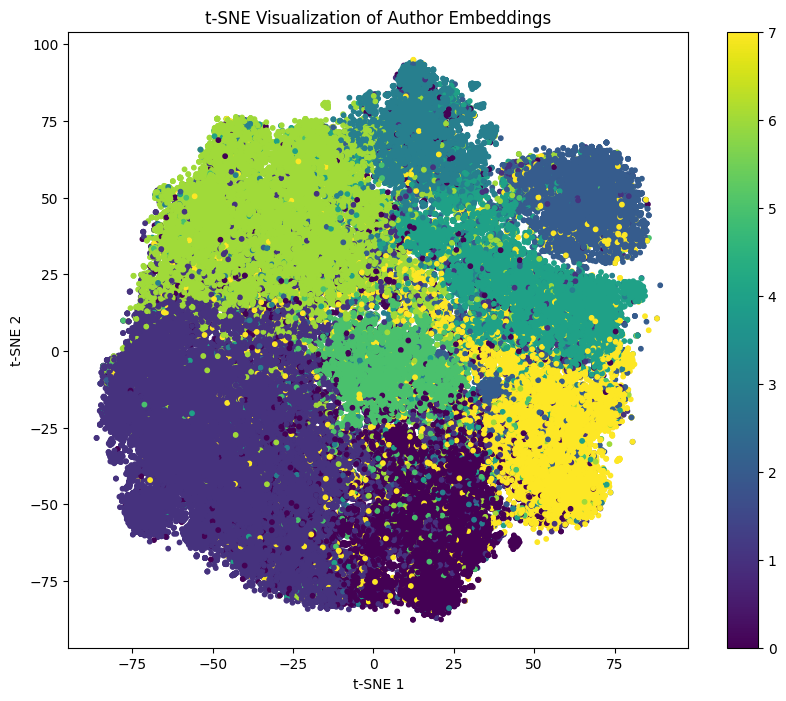

In [59]:
# Visualize the embeddings using t-SNE
@torch.no_grad()
def visualize_embeddings():
    # Set the model to evaluation mode
    model.eval()

    # Get the embeddings for 'author' nodes
    z = model('author', batch=aminer_data['author'].y_index.to(device)).cpu().numpy()
    y = aminer_data['author'].y.cpu().numpy()

    # Use t-SNE to reduce dimensionality of the embeddings to 2D
    tsne = TSNE(n_components=2, random_state=42)
    z_tsne = tsne.fit_transform(z)

    # Plot the t-SNE embeddings
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=y, cmap='viridis', s=10)
    plt.colorbar(scatter)
    plt.title('t-SNE Visualization of Author Embeddings')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()

# Call the visualization function after training
visualize_embeddings()